**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja.

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda.

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF).

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [2]:
!pip install PyWavelets
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy import signal
import pywt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.4 MB/s eta 0:00:00


**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku.

In [3]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

from google.colab import drive
drive.mount('/content/drive')

# Nakon što pokrenete ovaj odsječak koda, pojavit će se link u prozoru ispod. Kliknite na link, prijavite se sa svojim Google računom te ćete
# dobiti kod koji trebate kopirati u izlaz ispod ovog prozora (u prozor "Enter your authorization code: "). Nakon što upišete dobiveni kod,
# pojavit će se poruka "Mounted at /content/drive".
# Ako unutar takvog Colab Notebook direktorija imate spremljenu datoteku "OIkobas.mat", možete joj pristupiti sljedećim liniijama koda:
from scipy import io
kobas_iz_matlaba=io.loadmat("drive/My Drive/Colab Notebooks/3_OIkobas.mat")
print(kobas_iz_matlaba)
kobas=kobas_iz_matlaba['kobas']
kobas=np.squeeze(kobas)

Mounted at /content/drive
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [4]:
n=np.arange(0, kobas.size, 1)
print("Broj dana za koje postoje podaci o vodostajima: " + str(n.size))
print("Srednja vrijednost vodostaja: " + str(np.round(np.mean(kobas), 3)))
print("Standardna devijacija vodostaja: " + str(np.round(np.std(kobas), 3)))
print("Minimalna vrijednost vodostaja: " + str(np.min(kobas)))
print("Maksimalna vrijednost vodostaja: " + str(np.max(kobas)))
print("Median vodostaja: " + str(np.median(kobas)))

Broj dana za koje postoje podaci o vodostajima: 9496
Srednja vrijednost vodostaja: 294.258
Standardna devijacija vodostaja: 183.092
Minimalna vrijednost vodostaja: 17
Maksimalna vrijednost vodostaja: 878
Median vodostaja: 255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike.

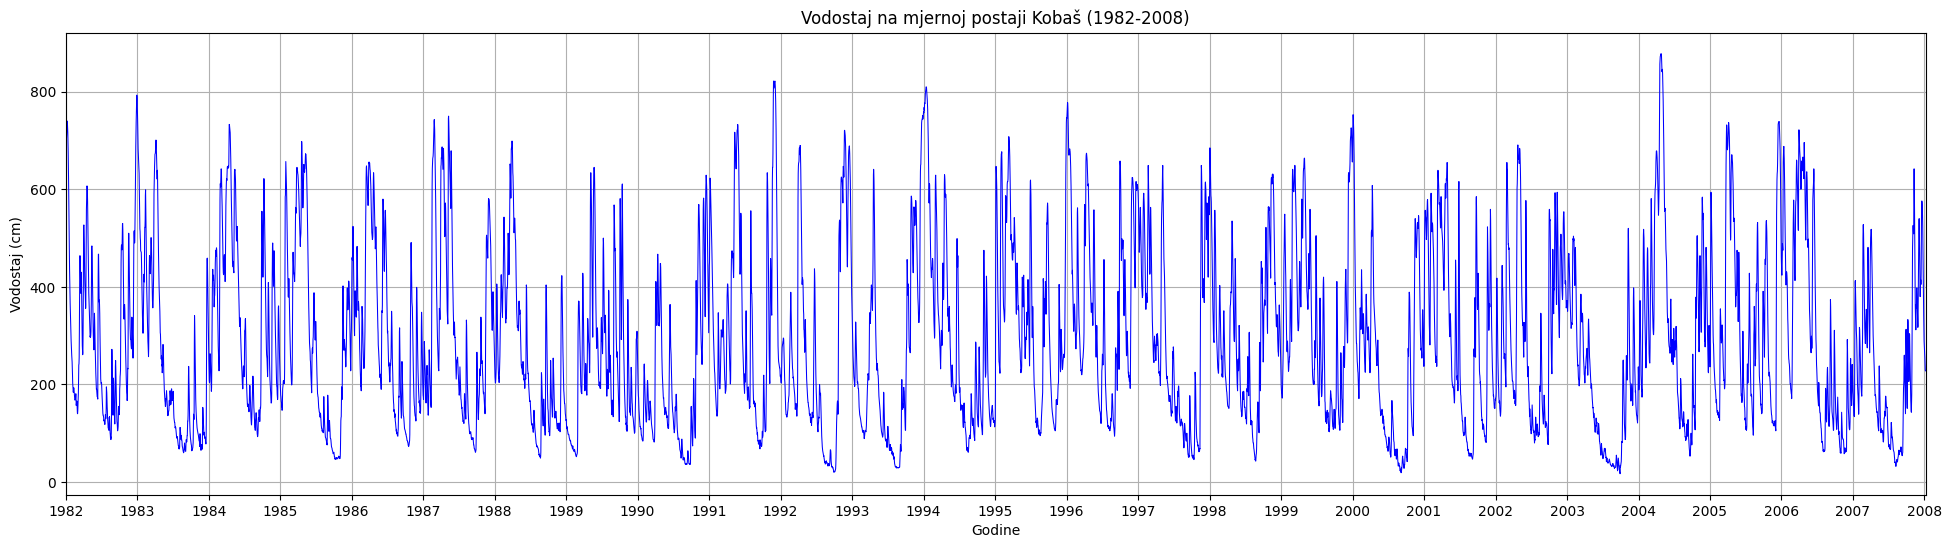

In [5]:
plt.figure(figsize=(24, 6))
plt.subplot(1, 1, 1)
plt.xlabel('Godine')
plt.ylabel('Vodostaj (cm)')
plt.title("Vodostaj na mjernoj postaji Kobaš (1982-2008)")
plt.plot(n, kobas, linestyle='-', color='b', linewidth=0.75)
plt.xlim(0, kobas.size)
plt.xticks(np.arange(0, kobas.size, 365), np.arange(1982, 2009, 1))
plt.grid(True)
plt.show()

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

Dobivene vrijednosti nakon Fourierove transformacije: [2794270.            -0.j           -9312.52756202+49784.33987081j
   80617.82235263-75905.53826228j ...  -75144.8689581 -18406.78122837j
   80617.82235263+75905.53826228j   -9312.52756202-49784.33987081j]


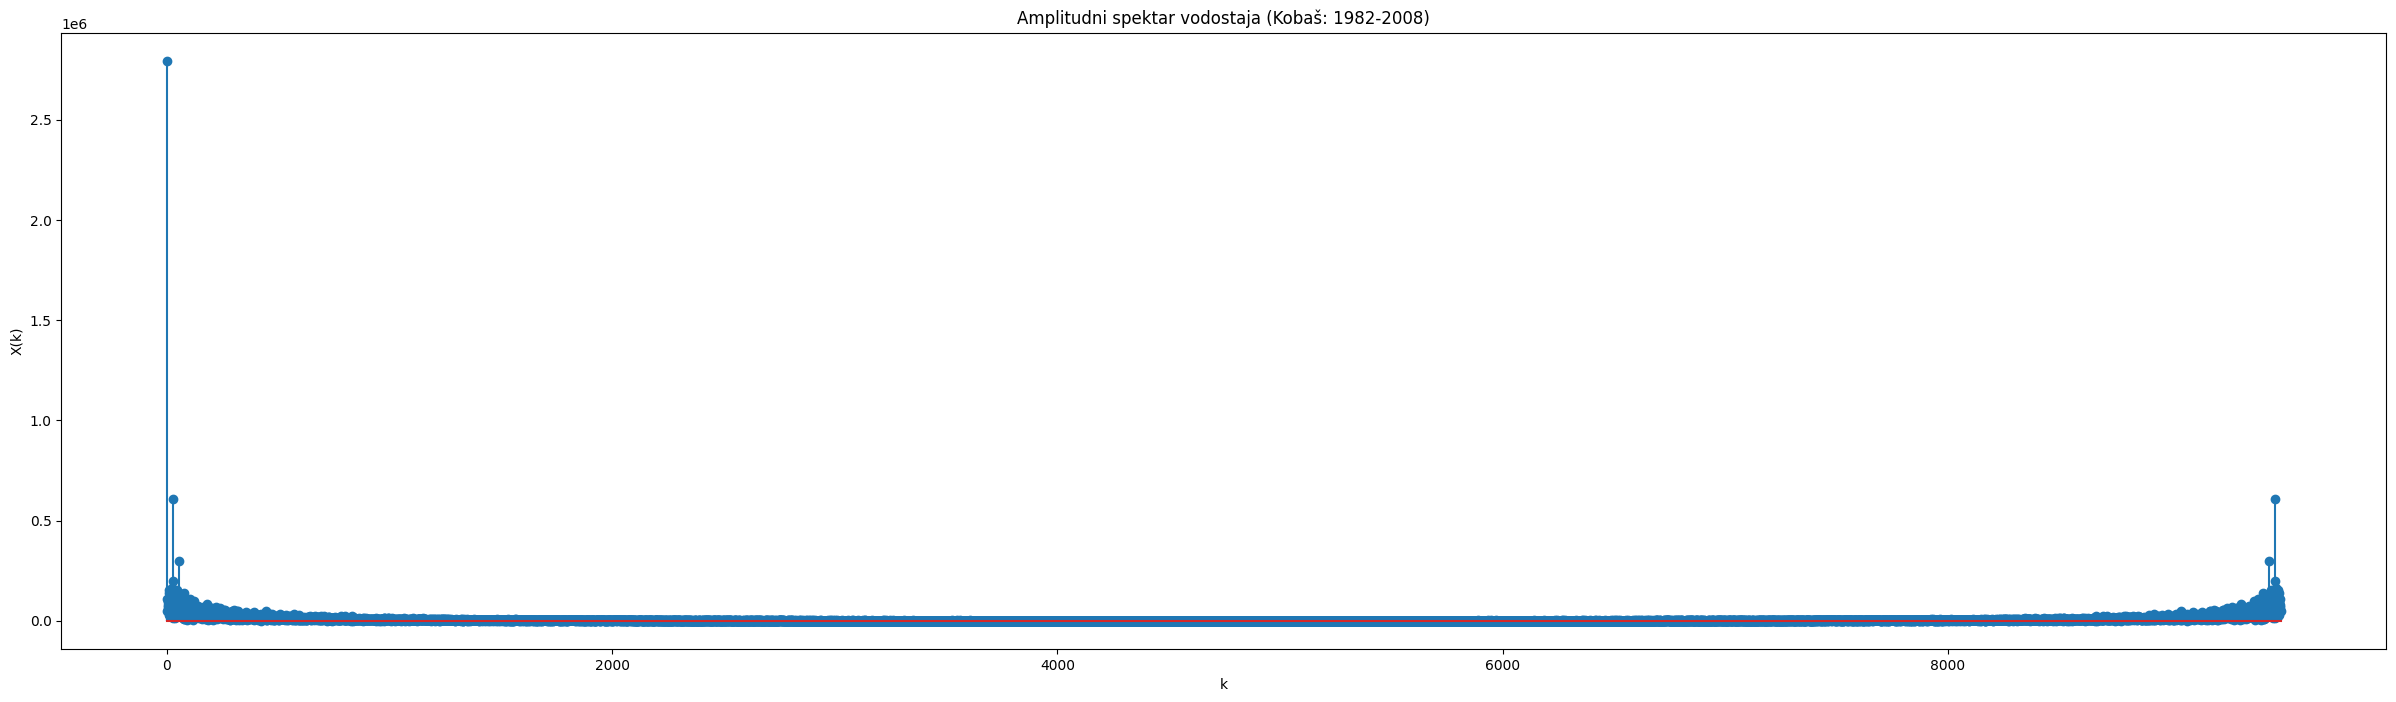

In [6]:
x = fft(kobas, kobas.size)
print("Dobivene vrijednosti nakon Fourierove transformacije: " + str(x))
plt.figure(figsize=(30, 8))
plt.xlabel('k')
plt.ylabel('X(k)')
plt.title("Amplitudni spektar vodostaja (Kobaš: 1982-2008)")
plt.stem(np.abs(x))
plt.show()

**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

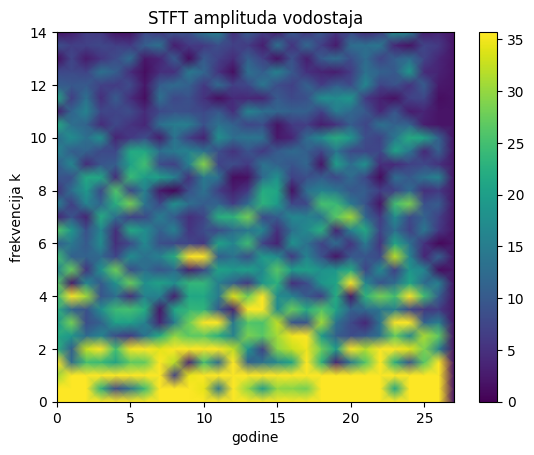

In [13]:
T=365 #broj uzoraka signala
n=np.arange(0,2*T,1) #vektor vremena: od 0 do 2T, korak=1

fs = 365
window = 'boxcar'
f, t, Zxx = signal.stft(kobas, fs, window, nperseg=2*T) #STFT, nperseg = duljina otvora
# izlazi : f = niz ocitanih frekvencija, t = niz vremena, Zxx = STFT od x

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.abs(Zxx.max())/10, shading = 'gouraud')
#2D slika apsolutnih vrijednosti Zxx, na apscisi je vrijeme t, na ordinati su frekvencije f
#abs(Zxx) je prikazana bojama, vmin i vmax odreduju raspon boja
#shading = nacin bojanja s interpolacijom
plt.colorbar() #raspon boja i veza s abs(Zxx)
plt.ylim(0 ,14)
plt.title("STFT amplituda vodostaja")
plt.ylabel("frekvencija k")
plt.xlabel("godine")
plt.show()

Na vodostaju su najizraženije frekvencije k=1 i k=2, koje odgovaraju vremenskim ciklusima od jedne godine i 1/2 godine. Na grafu se javljaju sušne godine koje su nastupile početkom 1990-ih.




**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

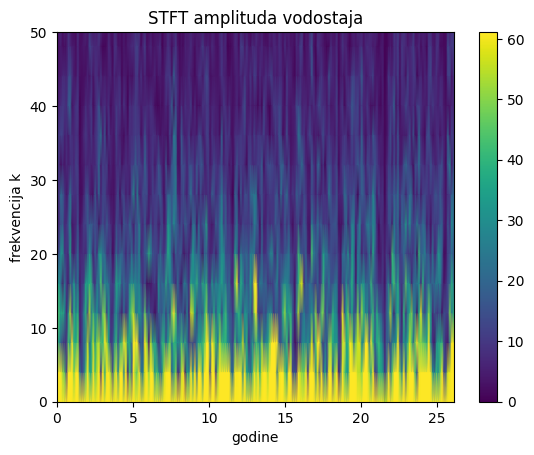

In [14]:
f, t, Zxx = signal.stft(kobas, fs, window, nperseg=T/4) #STFT, nperseg = duljina otvora
# izlazi : f = niz ocitanih frekvencija, t = niz vremena, Zxx = STFT od x

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0 ,vmax=np.abs(Zxx.max())/10, shading = 'gouraud')
#2D slika apsolutnih vrijednosti Zxx, na apscisi je vrijeme t, na ordinati su frekvencije f
#abs(Zxx) je prikazana bojama, vmin i vmax odreduju raspon boja
#shading = nacin bojanja s interpolacijom
plt.colorbar() #raspon boja i veza s abs(Zxx)
plt.title("STFT amplituda vodostaja")
plt.ylabel("frekvencija k")
plt.xlabel("godine")
plt.ylim(0, 50)
plt.show()

Koristio sam širinu prozora T/4 (1/4 godine), razlike u slikama proizlaze iz širine prozora, širi prozori omogućavaju bolju frekvencijsku rezoluciju, ali slabiju vremensku preciznost, dok uži prozori bolje prepoznaju vremenske promjene, ali slabo razlučuju bliske frekvencije.

**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


Text(0.5, 1.0, 'Sombrero')

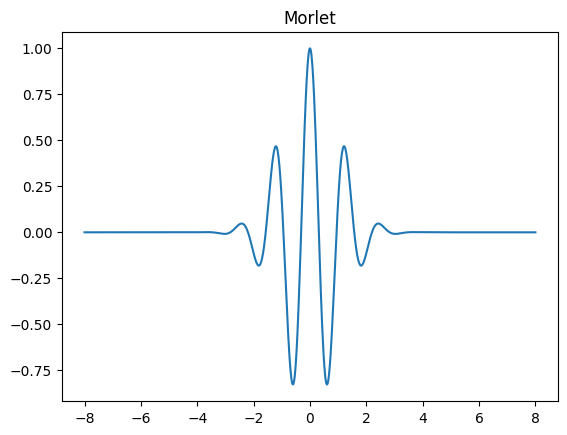

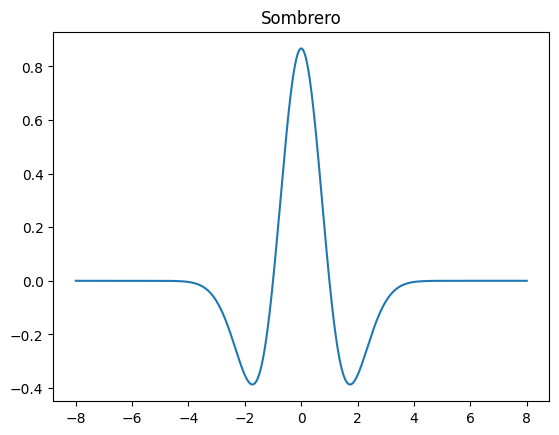

In [9]:
print(pywt.wavelist(kind='continuous'))
valic1 = 'morl'
valic2 = 'mexh'
w1 = pywt.ContinuousWavelet(valic1)
w2 = pywt.ContinuousWavelet(valic2)

psi1, t1 = w1.wavefun(level=10)
plt.figure(1)
plt.plot(t1, psi1)
plt.title("Morlet")

psi2, t2 = w2.wavefun(level=10)
plt.figure(2)
plt.plot(t2, psi2)
plt.title("Sombrero")

**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

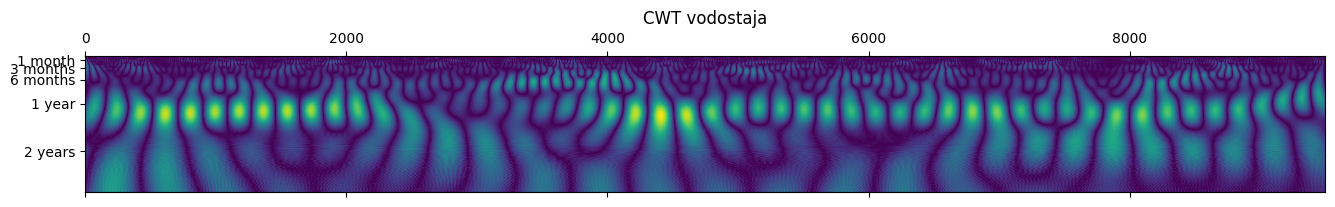

In [10]:
valic = 'morl'
step = 0.7
skala = np.arange(0.1, 2*T, step)
coef, freqs = pywt.cwt(kobas, skala, valic)
plt.matshow(abs(coef))
plt.yticks([T//12, T//4, T//2, T, 2*T], ['1 month', '3 months', '6 months', '1 year', '2 years'])
plt.title("CWT vodostaja")
plt.show()

Najdominantnije frekvencije se nalaze u rasponu od 6 mjeseci do 1 godine, što znači da je signal dominantan u frekvencijskom rasponu polugodišnjih do jednogodišnjih ciklusa. Na signalu se javljaju, i jasno su vidljive, sušne godine koje su nastupile početkom 1990-ih.





**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.

Razlika između rezultata proizlazi iz toga što STFT ima fiksne vremenske i frekvencijske rezolucije koje se ne mijenjaju kroz cijeli signal, dok se kod CWT koriste različite rezolucije ovisno o frekvenciji signala.

